In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import gaussian_filter1d

def smooth(x):
    return gaussian_filter1d(x, sigma=3)

def convertdate(x):
    return np.datetime64(x, 'D')

df_us_states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

df_us_states.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [3]:
df_us_states.describe()

fips         cases        deaths
count  53710.000000  5.371000e+04  53710.000000
mean      32.203854  7.504556e+05  10561.372091
std       18.770086  1.274248e+06  15951.946081
min        1.000000  1.000000e+00      0.000000
25%       17.000000  5.513200e+04    919.000000
50%       31.000000  2.940410e+05   4330.000000
75%       46.000000  8.834650e+05  13241.750000
max       78.000000  1.136159e+07  96928.000000

In [4]:
df_us_states.tail(10)

53710


date           state  fips    cases  deaths
53700  2022-10-27       Tennessee    47  2298594   27792
53701  2022-10-27           Texas    48  7928300   91374
53702  2022-10-27            Utah    49  1045472    5056
53703  2022-10-27         Vermont    50   144895     740
53704  2022-10-27  Virgin Islands    78    23311     124
53705  2022-10-27        Virginia    51  2116060   22171
53706  2022-10-27      Washington    53  1835720   14595
53707  2022-10-27   West Virginia    54   607087    7513
53708  2022-10-27       Wisconsin    55  1894346   15434
53709  2022-10-27         Wyoming    56   178444    1908

In [5]:
all_states = df_us_states.state.drop_duplicates().sort_values()
all_states

586                       Alabama
539                        Alaska
31256              American Samoa
8                         Arizona
495                      Arkansas
5                      California
303                      Colorado
386                   Connecticut
499                      Delaware
353          District of Columbia
242                       Florida
256                       Georgia
700                          Guam
327                        Hawaii
598                         Idaho
3                        Illinois
329                       Indiana
393                          Iowa
359                        Kansas
330                      Kentucky
431                     Louisiana
556                         Maine
307                      Maryland
35                  Massachusetts
471                      Michigan
333                     Minnesota
514                   Mississippi
364                      Missouri
612                       Montana
133           

In [6]:
pd_deaths_per_state = pd.pivot(df_us_states, index='date', columns='state', values='deaths')
pd_deaths_per_state.dropna()

state       Alabama  Alaska  American Samoa  Arizona  Arkansas  California  \
date                                                                         
2021-09-22  13665.0   464.0             0.0  19658.0    7528.0     68402.0   
2021-09-23  13798.0   471.0             0.0  19727.0    7548.0     68532.0   
2021-09-24  13921.0   515.0             0.0  19737.0    7561.0     68710.0   
2021-09-25  14022.0   515.0             0.0  19806.0    7575.0     68740.0   
2021-09-26  14022.0   515.0             0.0  19812.0    7590.0     68756.0   
...             ...     ...             ...      ...       ...         ...   
2022-10-23  20533.0  1350.0            34.0  31514.0   12425.0     96712.0   
2022-10-24  20533.0  1350.0            34.0  31514.0   12426.0     96738.0   
2022-10-25  20533.0  1350.0            34.0  31514.0   12439.0     96747.0   
2022-10-26  20533.0  1369.0            34.0  31548.0   12452.0     96780.0   
2022-10-27  20558.0  1369.0            34.0  31548.0   12462.0     96928.0   

state       Colorado  Connecticut  Delaware  District of Columbia  ...  \
date                                                               ...   
2021-09-22    7619.0       8484.0    1929.0                1171.0  ...   
2021-09-23    7634.0       8483.0    1942.0                1172.0  ...   
2021-09-24    7648.0       8501.0    1942.0                1172.0  ...   
2021-09-25    7649.0       8501.0    1942.0                1172.0  ...   
2021-09-26    7662.0       8501.0    1942.0                1172.0  ...   
...              ...          ...       ...                   ...  ...   
2022-10-23   13592.0      11424.0    3136.0                1392.0  ...   
2022-10-24   13596.0      11424.0    3136.0                1392.0  ...   
2022-10-25   13601.0      11448.0    3136.0                1392.0  ...   
2022-10-26   13606.0      11448.0    3136.0                1392.0  ...   
2022-10-27   13614.0      11462.0    3136.0                1392.0  ...   

state       Tennessee    Texas    Utah  Vermont  Virgin Islands  Virginia  \
date                                                                        
2021-09-22    14560.0  63162.0  2841.0    301.0            69.0   12409.0   
2021-09-23    14623.0  63608.0  2860.0    301.0            69.0   12463.0   
2021-09-24    14707.0  64016.0  2869.0    304.0            69.0   12511.0   
2021-09-25    14707.0  64274.0  2869.0    306.0            69.0   12511.0   
2021-09-26    14707.0  64419.0  2869.0    310.0            69.0   12511.0   
...               ...      ...     ...      ...             ...       ...   
2022-10-23    27735.0  91312.0  5047.0    734.0           123.0   22108.0   
2022-10-24    27735.0  91341.0  5047.0    734.0           123.0   22118.0   
2022-10-25    27735.0  91345.0  5047.0    734.0           123.0   22138.0   
2022-10-26    27792.0  91369.0  5047.0    740.0           124.0   22155.0   
2022-10-27    27792.0  91374.0  5056.0    740.0           124.0   22171.0   

state       Washington  West Virginia  Wisconsin  Wyoming  
date                                                       
2021-09-22      7423.0         3467.0     8754.0    955.0  
2021-09-23      7487.0         3492.0     8775.0    955.0  
2021-09-24      7537.0         3523.0     8794.0    955.0  
2021-09-25      7537.0         3523.0     8794.0    955.0  
2021-09-26      7537.0         3523.0     8794.0    955.0  
...                ...            ...        ...      ...  
2022-10-23     14549.0         7487.0    15398.0   1906.0  
2022-10-24     14561.0         7493.0    15398.0   1906.0  
2022-10-25     14572.0         7502.0    15414.0   1908.0  
2022-10-26     14585.0         7502.0    15417.0   1908.0  
2022-10-27     14595.0         7513.0    15434.0   1908.0  

[401 rows x 56 columns]

In [7]:
pd_cases_per_state = pd.pivot(df_us_states, index='date', columns='state', values='cases')
pd_cases_per_state.dropna()

state         Alabama    Alaska  American Samoa    Arizona  Arkansas  \
date                                                                   
2021-09-22   778549.0  103795.0             1.0  1072863.0  488316.0   
2021-09-23   781915.0  105110.0             1.0  1075876.0  489856.0   
2021-09-24   784484.0  106888.0             1.0  1078874.0  491221.0   
2021-09-25   787421.0  106888.0             1.0  1081790.0  492233.0   
2021-09-26   789054.0  106888.0             1.0  1084369.0  492650.0   
...               ...       ...             ...        ...       ...   
2022-10-23  1531305.0  306062.0          8251.0  2283073.0  957914.0   
2022-10-24  1531305.0  306062.0          8251.0  2283073.0  958051.0   
2022-10-25  1531305.0  306062.0          8251.0  2283073.0  958370.0   
2022-10-26  1531305.0  306446.0          8251.0  2287886.0  958675.0   
2022-10-27  1534287.0  306446.0          8251.0  2287886.0  959014.0   

state       California   Colorado  Connecticut  Delaware  \
date                                                       
2021-09-22   4677452.0   660023.0     386672.0  129231.0   
2021-09-23   4687178.0   662451.0     387263.0  129874.0   
2021-09-24   4694673.0   664010.0     387733.0  130444.0   
2021-09-25   4696228.0   664396.0     387733.0  131043.0   
2021-09-26   4697407.0   664782.0     387733.0  131424.0   
...                ...        ...          ...       ...   
2022-10-23  11339108.0  1675374.0     908510.0  312019.0   
2022-10-24  11343283.0  1676838.0     909382.0  312430.0   
2022-10-25  11344365.0  1677845.0     909866.0  312517.0   
2022-10-26  11345628.0  1678736.0     910367.0  312655.0   
2022-10-27  11361592.0  1679515.0     910919.0  312850.0   

state       District of Columbia  ...  Tennessee      Texas       Utah  \
date                              ...                                    
2021-09-22               59849.0  ...  1172596.0  3972002.0   497521.0   
2021-09-23               60018.0  ...  1176400.0  3982646.0   499120.0   
2021-09-24               60205.0  ...  1181691.0  3999392.0   500792.0   
2021-09-25               60205.0  ...  1181691.0  4005238.0   500792.0   
2021-09-26               60205.0  ...  1181691.0  4011213.0   500792.0   
...                          ...  ...        ...        ...        ...   
2022-10-23              169436.0  ...  2293313.0  7921000.0  1043639.0   
2022-10-24              169436.0  ...  2293313.0  7924384.0  1043639.0   
2022-10-25              169436.0  ...  2293313.0  7924837.0  1043639.0   
2022-10-26              169436.0  ...  2298594.0  7927898.0  1043639.0   
2022-10-27              169436.0  ...  2298594.0  7928300.0  1045472.0   

state        Vermont  Virgin Islands   Virginia  Washington  West Virginia  \
date                                                                         
2021-09-22   32079.0          6557.0   843212.0    635636.0       227506.0   
2021-09-23   32368.0          6557.0   846979.0    640094.0       228983.0   
2021-09-24   32610.0          6557.0   849865.0    643183.0       231668.0   
2021-09-25   32790.0          6557.0   849865.0    643183.0       233426.0   
2021-09-26   33031.0          6557.0   849865.0    643285.0       234802.0   
...              ...             ...        ...         ...            ...   
2022-10-23  144346.0         23283.0  2110071.0   1832792.0       605830.0   
2022-10-24  144346.0         23283.0  2112539.0   1834047.0       606394.0   
2022-10-25  144346.0         23305.0  2113552.0   1834305.0       606615.0   
2022-10-26  144895.0         23311.0  2114758.0   1835348.0       606794.0   
2022-10-27  144895.0         23311.0  2116060.0   1835720.0       607087.0   

state       Wisconsin   Wyoming  
date                             
2021-09-22   787194.0   86594.0  
2021-09-23   790787.0   87351.0  
2021-09-24   793981.0   87866.0  
2021-09-25   793981.0   87866.0  
2021-09-26   793981.0   87866.0  
...               ...       ...  
2022-10-23  1888018.0  178032.0 

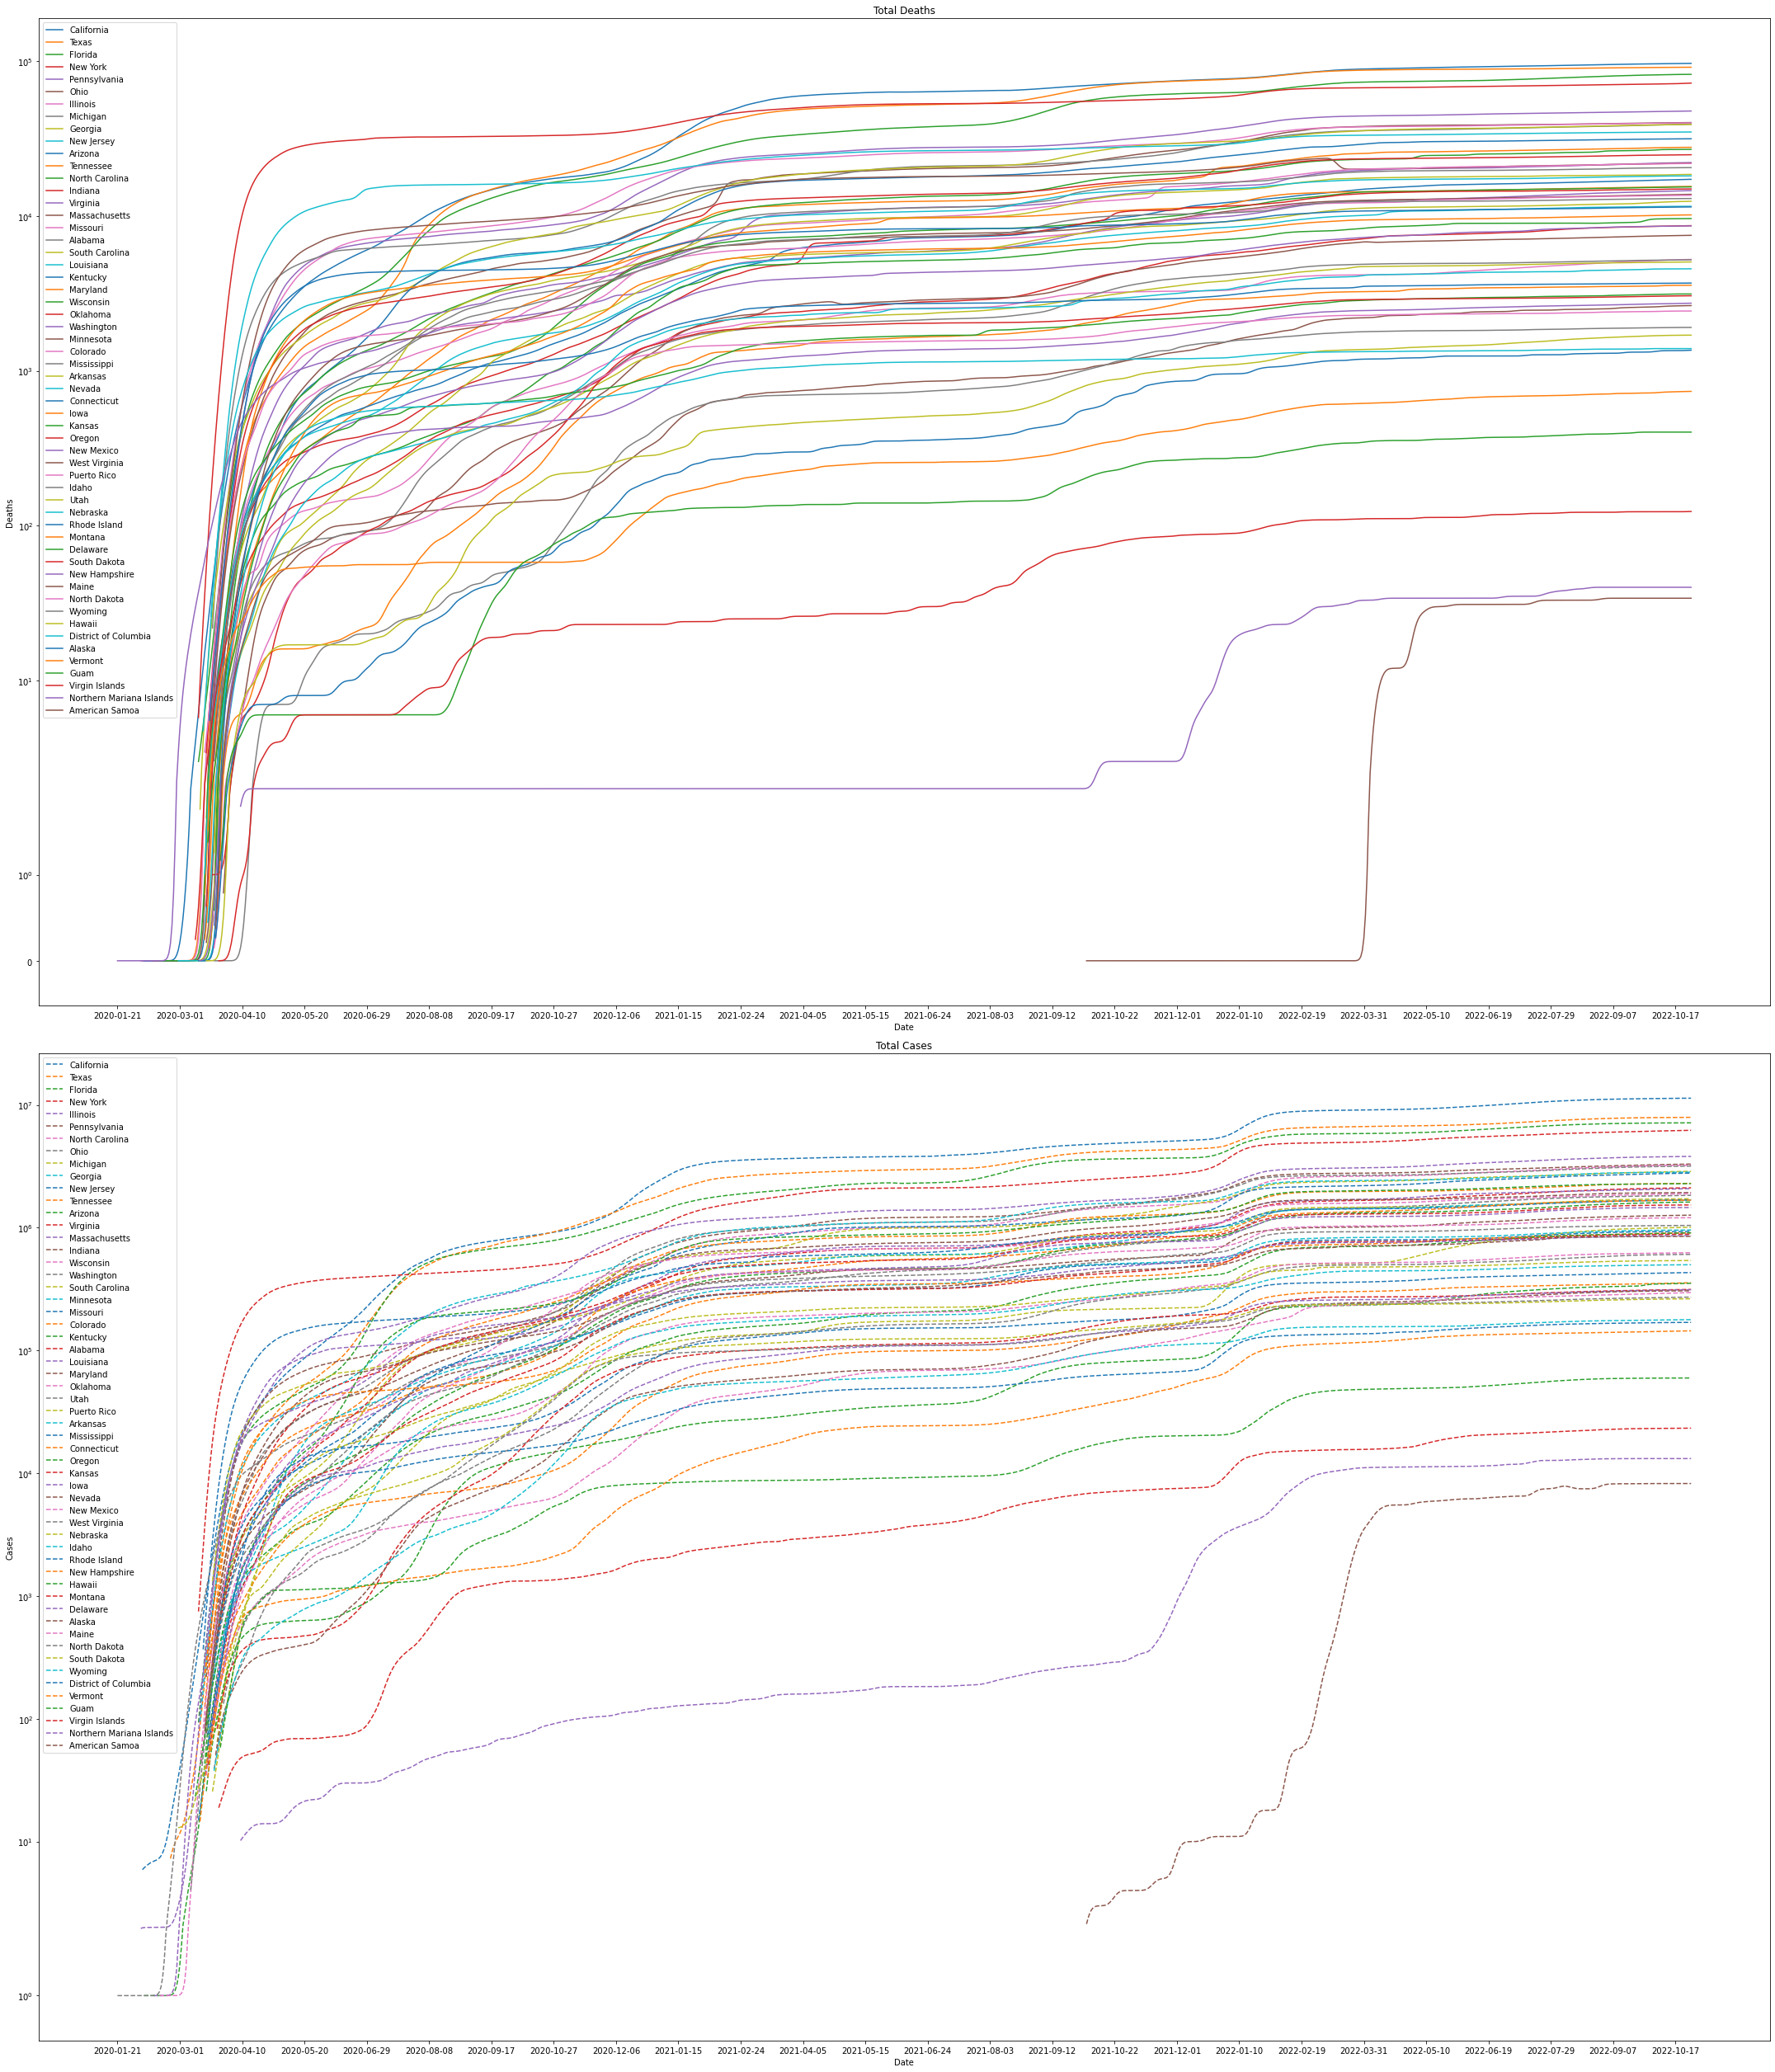

In [8]:
plt.rcParams["figure.autolayout"] = True

# deaths
states_descending_death = pd_deaths_per_state.sort_values(by=pd_deaths_per_state.index[-1], axis=1, ascending=False)

# cases
last_data_cases = pd_cases_per_state.tail(1)
states_descending_cases = pd_cases_per_state.sort_values(by=pd_cases_per_state.index[-1], axis=1, ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 35))

for state in states_descending_death:
    ax1.plot(pd_deaths_per_state.index, smooth(pd_deaths_per_state[state]), label=state, linestyle='-')

for state in states_descending_cases:
    ax2.plot(pd_cases_per_state.index, smooth(pd_cases_per_state[state]), label=state, linestyle='--')

ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.set_yscale('symlog')
ax1.set_xticks(pd_deaths_per_state.index[::40])
ax1.set_title('Total Deaths')
ax1.legend()



ax2.set_xlabel('Date')
ax2.set_ylabel('Cases')
ax2.set_yscale('symlog')
ax2.set_xticks(pd_deaths_per_state.index[::40])
ax2.set_title('Total Cases')
ax2.legend()

plt.show()

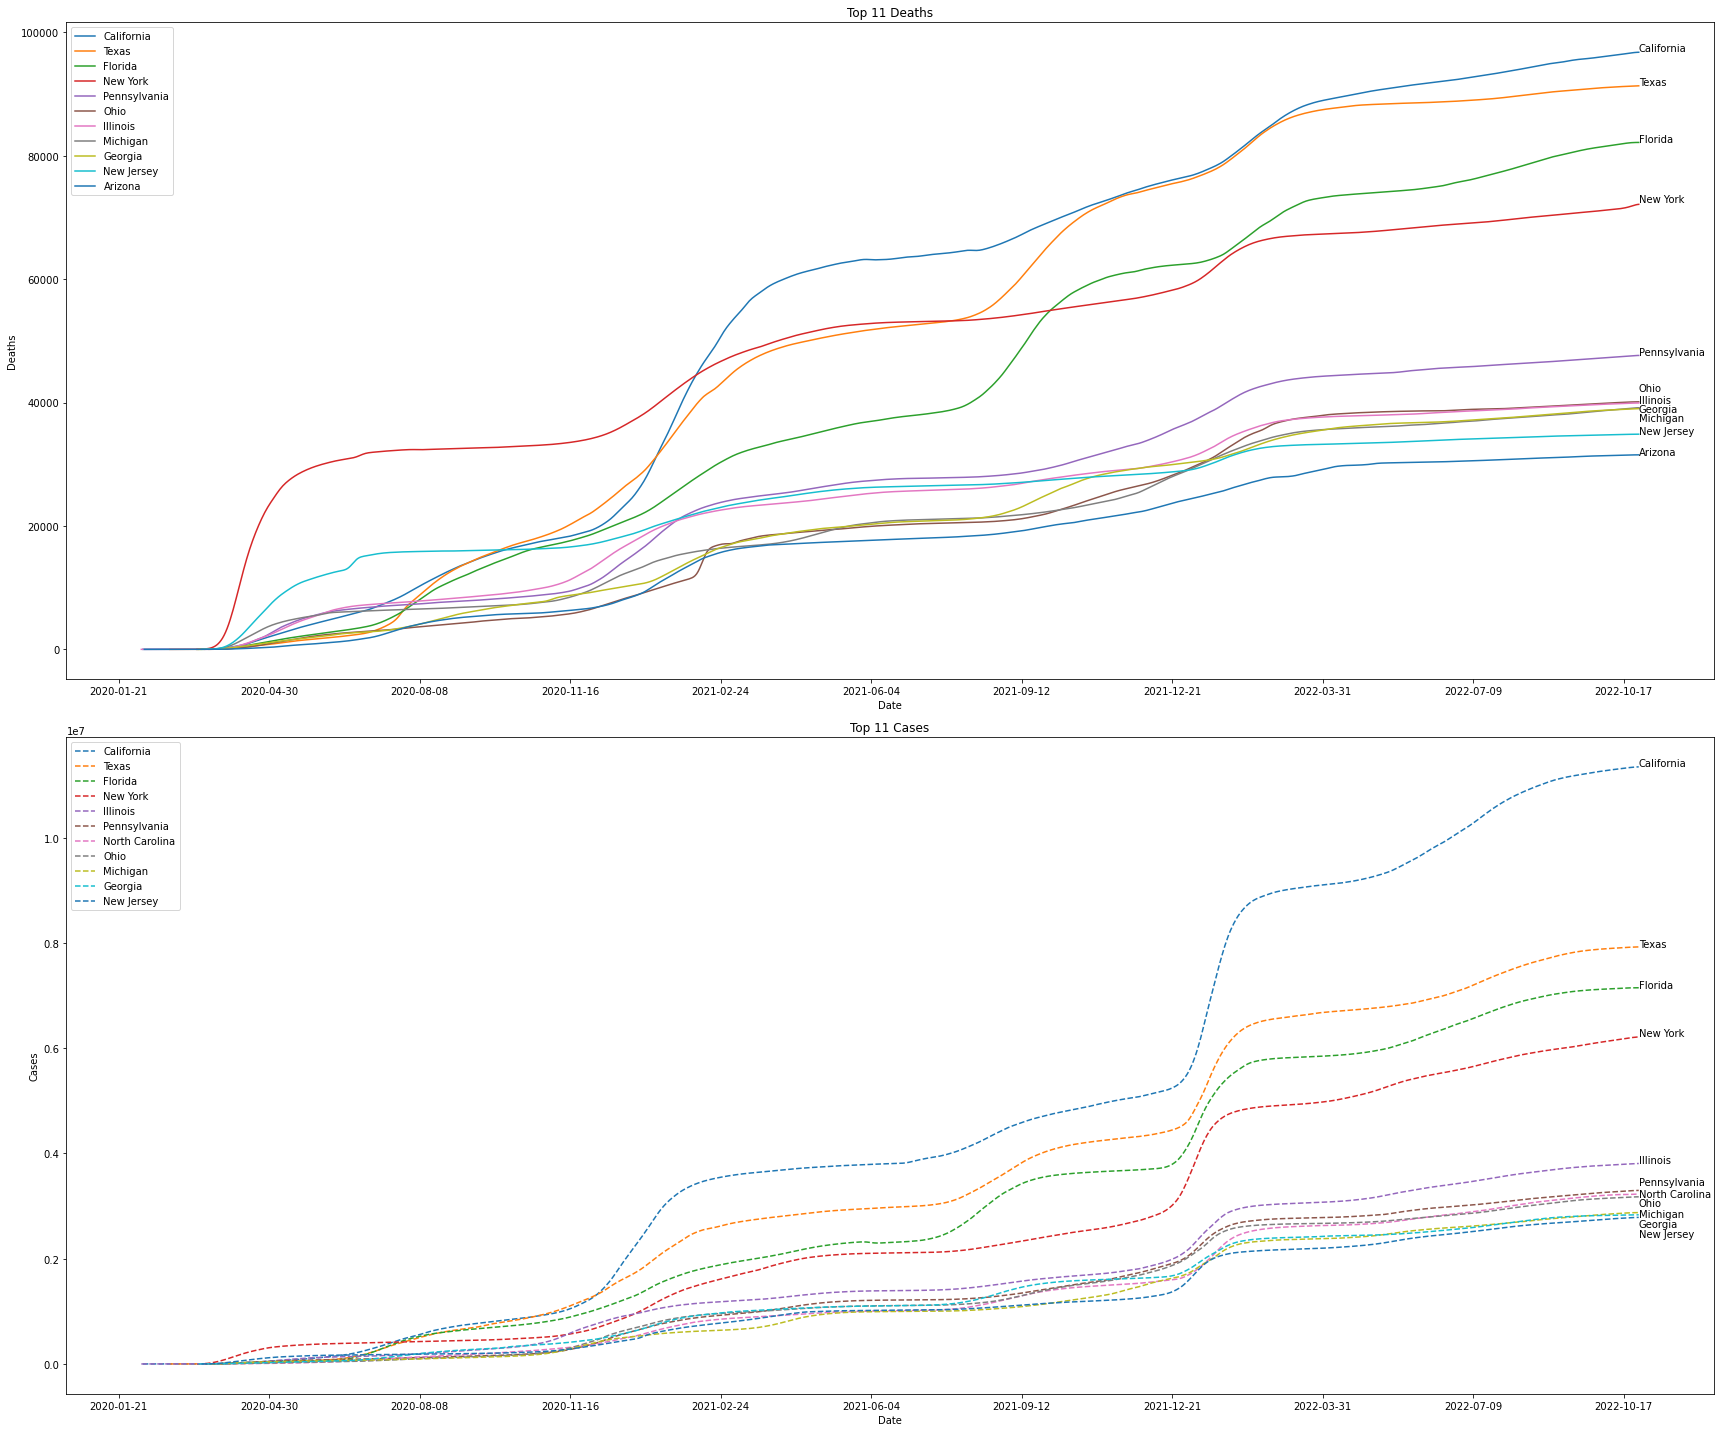

In [12]:
import matplotlib.transforms as mtransforms

# Top 10 max Death
top10death = states_descending_death.columns[:11] # Arizona
# Top 10 max Cases
top10cases = states_descending_cases.columns[:11] # North Carolina

fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(24, 20))

# Manually adjust the label positions
y_offsets_death = {k: 0 for k in top10death}
y_offsets_death['Ohio'] = 10
y_offsets_death['Illinois'] = 0
y_offsets_death['Georgia'] = -4
y_offsets_death['Michigan'] = -14

y_offsets_cases = {k: 0 for k in top10cases}
y_offsets_cases['Pennsylvania'] = 5
y_offsets_cases['North Carolina'] = -4
y_offsets_cases['Ohio'] = -10
y_offsets_cases['Michigan'] = -5
y_offsets_cases['Georgia'] = -12
y_offsets_cases['New Jersey'] = -20

for state in top10death:
    ax3.plot(pd_deaths_per_state.index, smooth(pd_deaths_per_state[state]), label=state, linestyle='-')

    offset = y_offsets_death[state] / 72
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax3.transData + trans
    ax3.text(pd_deaths_per_state.index[-1], pd_deaths_per_state[state][-1], state, transform=trans)

for state in top10cases:
    ax4.plot(pd_cases_per_state.index, smooth(pd_cases_per_state[state]), label=state, linestyle='--')

    offset = y_offsets_cases[state] / 72
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax4.transData + trans
    ax4.text(pd_cases_per_state.index[-1], pd_cases_per_state[state][-1], state, transform=trans)

ax3.set_xlabel('Date')
ax3.set_ylabel('Deaths')
ax3.set_xticks(pd_deaths_per_state.index[::100])
ax3.set_title('Top 11 Deaths')
ax3.legend()

ax4.set_xlabel('Date')
ax4.set_ylabel('Cases')
ax4.set_xticks(pd_cases_per_state.index[::100])
ax4.set_title('Top 11 Cases')
ax4.legend()

fig2.tight_layout()

plt.show()

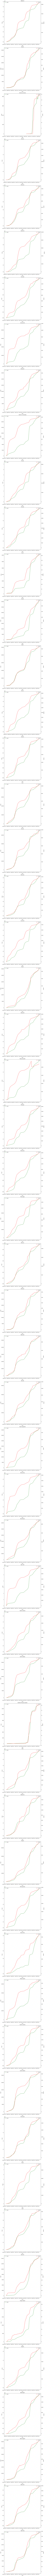

In [15]:
#Worst 12 states Deaths/Cases
worst12states = np.unique(np.concatenate((top10death, top10cases)))

fig3, axes = plt.subplots(len(all_states),1, figsize=(10, 10 * len(all_states)  ))


for idx, state in enumerate(all_states):
    it = axes[idx]
    it.plot(states_descending_cases.index, smooth(states_descending_cases[state]), label='cases', color='green')

    it2 = it.twinx()
    it2.plot(states_descending_death.index, smooth(states_descending_death[state]), label='deaths', color='r')

    it2.legend(loc='upper right')
    it.legend(loc='upper left')

    it.set_title(state)
    it.set_xlabel('Date')
    it.set_ylabel('Cases')
    it2.set_ylabel('Deaths')
    it.set_xticks(pd_cases_per_state.index[::120])
plt.show()
